In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

отлично! пропусков нет, типы данных понятны! Посмотрим на выбросы в тех столбцах в которых они должны быть - с числовыми данными!

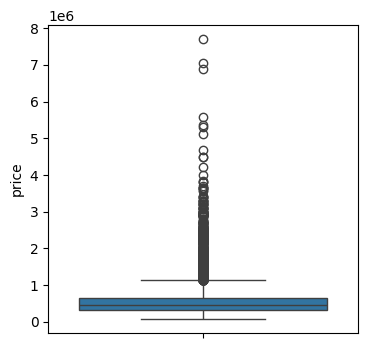

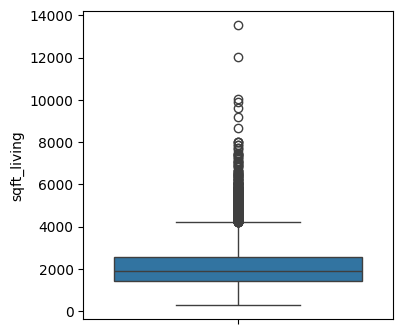

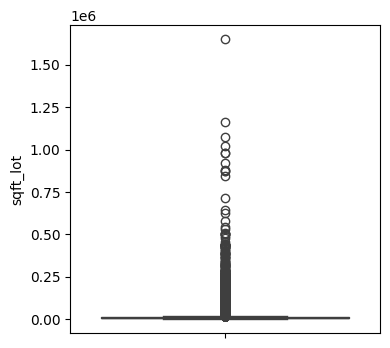

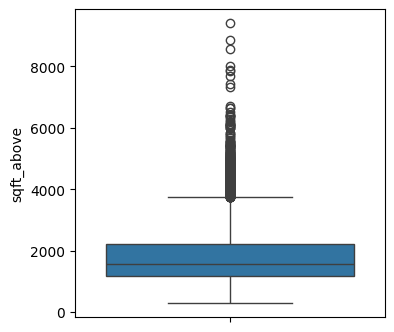

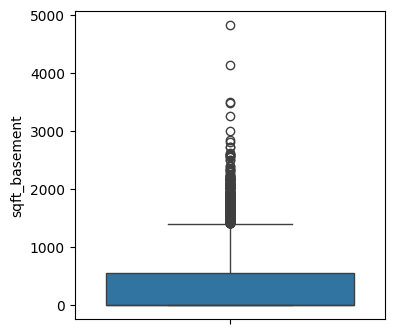

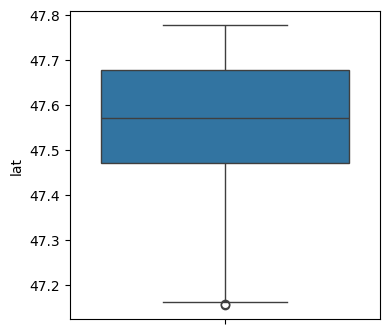

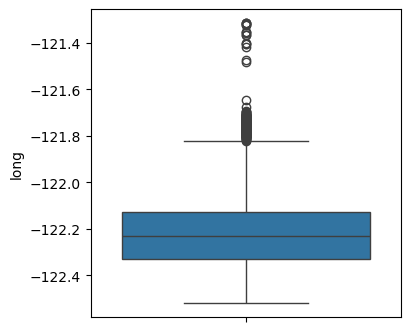

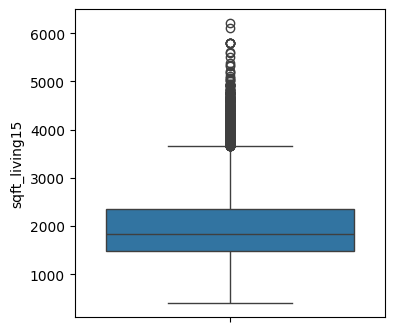

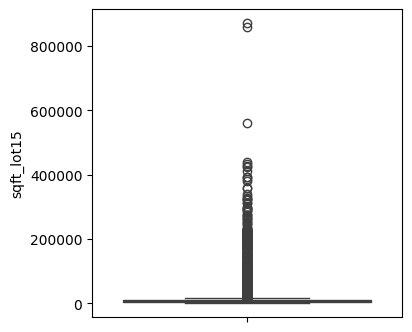

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 

for column in df.iloc[:, [2, 5, 6, 12, 13, 17, 18, 19,20]]:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df[column])

plt.show()

видим, что все числовые признаки имеют значительный разброс! Поборемся с этим!

In [5]:
from scipy import stats

threshold = 3

for column in df.iloc[:, [2, 5, 6, 12, 13, 17, 18, 19,20]]:
    z_scores = stats.zscore(df[column])
    median_value = df[column].median()  # Медиана всего столбца - говорит, что устойчива к выбросам!
    df.loc[abs(z_scores) > threshold, column] = median_value  # Заменяем выбросы

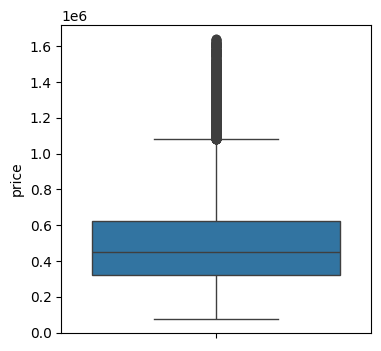

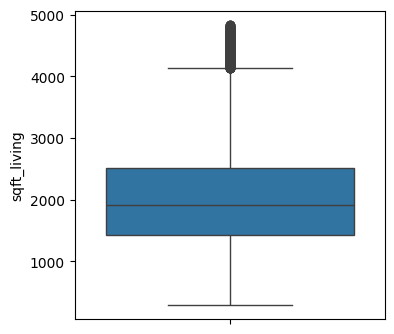

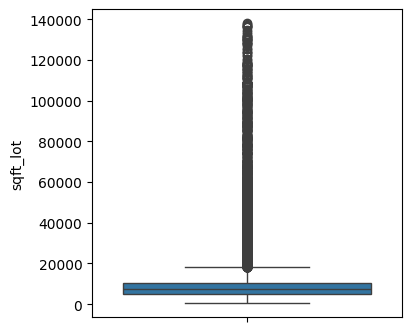

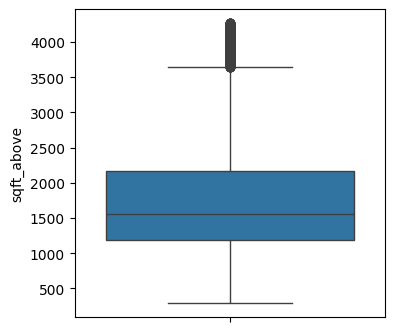

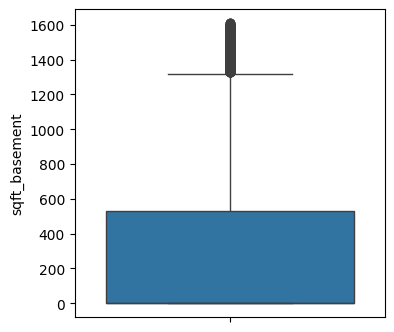

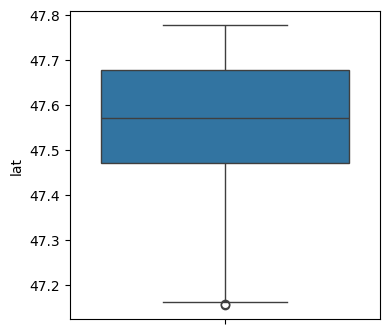

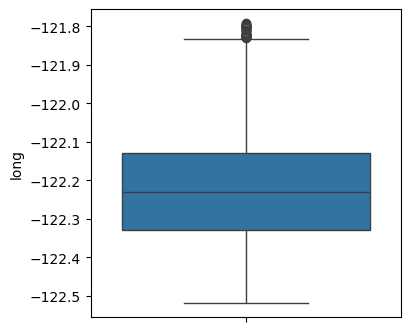

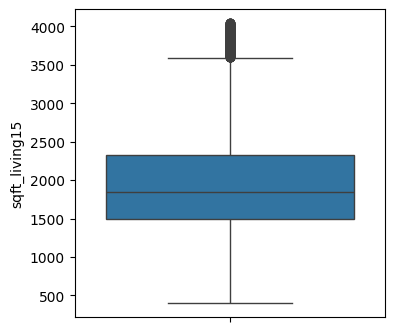

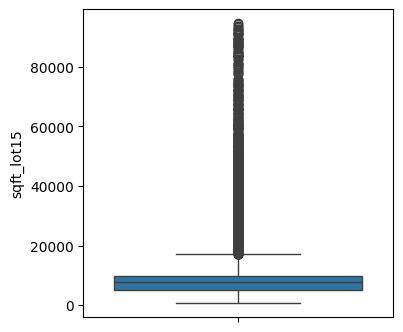

In [6]:
for column in df.iloc[:, [2, 5, 6, 12, 13, 17, 18, 19,20]]:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df[column])

plt.show()

НУ! стало лучше!

Оценим связи

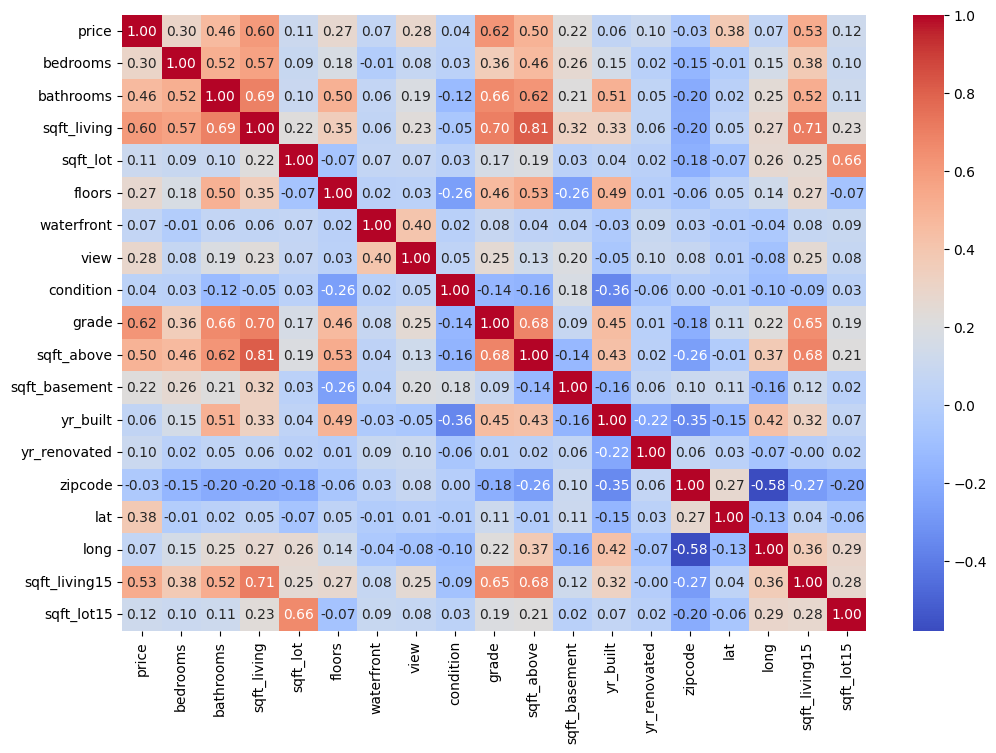

In [7]:
res=df.iloc[:,2:].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(res,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Видим, что на все сильно влияет площадь: Жилая площадь влияет на какую-то оценку(grade), на нее же влияет площадь подвала или чердака. Ну и все это имеет прямую связь со стоимостью: grade, sqft_living и sqft_living15 прямо слабо коррелируют с ценой!

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [9]:
import math
n1=math.floor(0.2*len(df))
test_part=df.iloc[:n1,:].copy()
study_part=df.iloc[n1:,:].copy()

In [10]:
# Разделяем признаки и целевую переменную
X = study_part[['sqft_living', 'grade']]  # Факторы
y = study_part['price']                                 # Целевая переменная

# Обучение модели
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов
print("Коэффициенты модели (w1, w2):", model.coef_)
print("Сдвиг (b):", model.intercept_)

# Прогнозирование

test_part['predict_price']=model.predict(test_part[['sqft_living', 'grade']])
test_part.sample(50)[['sqft_living','grade','price','predict_price']]

Коэффициенты модели (w1, w2): [  104.87388621 83408.39547929]
Сдвиг (b): -347595.6730111906


,sqft_living,grade,price,predict_price
1521,1650,8,550000.0,4.927134e+05
3399,1300,7,650000.0,3.725991e+05
243,1300,6,225000.0,2.891908e+05
3344,4230,11,450000.0,1.013513e+06
3826,3620,9,856000.0,7.827234e+05
701,820,6,195000.0,2.388513e+05
1960,1790,8,800000.0,5.073957e+05
640,1300,7,378000.0,3.725991e+05
2821,1000,6,332000.0,2.577286e+05
3421,1540,7,445000.0,3.977689e+05


In [11]:
# Оценка качества
mse = mean_squared_error(test_part['price'],test_part['predict_price'])  # Среднеквадратическая ошибка
mae = mean_absolute_error(test_part['price'],test_part['predict_price'])  # Средняя абсолютная ошибка
r2 = r2_score(test_part['price'],test_part['predict_price'])              # Коэффициент детерминации

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: 0.44180803274271985
MSE: 37454579303.407524
MAE: 142237.29797273932


Мягко говоря плоховато! Добавим факторов!

In [12]:
# Разделяем признаки и целевую переменную
X = study_part[['sqft_living', 'grade','bedrooms','floors','condition','sqft_above','zipcode','lat','long','view']]  # Факторы
y = study_part['price']                                 # Целевая переменная

# Обучение модели
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов
print("Коэффициенты модели (w1, w2):", model.coef_)
print("Сдвиг (b):", model.intercept_)

# Прогнозирование

test_part['predict_price']=model.predict(test_part[['sqft_living', 'grade','bedrooms','floors','condition','sqft_above','zipcode','lat','long','view']])
test_part.sample(10)[['price','predict_price']]

Коэффициенты модели (w1, w2): [ 1.07587744e+02  6.85842567e+04 -8.24959429e+03  1.63126116e+03
  3.95940640e+04  1.33839982e+01 -1.53120836e+02  6.16857325e+05
 -1.21817401e+05  3.90522184e+04]
Сдвиг (b): -29589650.231535755


,price,predict_price
2313,243000.0,393926.813910
1220,475000.0,697249.674679
3576,307000.0,301486.425038
425,245000.0,313222.490054
1936,335000.0,504134.563815
630,218000.0,78118.202961
1230,349000.0,494181.896419
758,856600.0,683354.973398
862,539900.0,541897.696393
590,505000.0,420357.896814


In [13]:
# Оценка качества
mse = mean_squared_error(test_part['price'],test_part['predict_price'])  # Среднеквадратическая ошибка
mae = mean_absolute_error(test_part['price'],test_part['predict_price'])  # Средняя абсолютная ошибка
r2 = r2_score(test_part['price'],test_part['predict_price'])              # Коэффициент детерминации

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: 0.5700325551507469
MSE: 28850737211.64305
MAE: 116120.458816494


Больше факторов увеличивает точность! Усилим напых!

In [14]:
# Разделяем признаки и целевую переменную
X = study_part[study_part.columns[2:]]  # Факторы
y = study_part['price']                                 # Целевая переменная

# Обучение модели
model = LinearRegression()
model.fit(X, y)

# Получение коэффициентов
print("Коэффициенты модели (w1, w2):", model.coef_)
print("Сдвиг (b):", model.intercept_)

# Прогнозирование

test_part['predict_price']=model.predict(test_part[test_part.columns[2:21]])
test_part.sample(10)[['price','predict_price']]

Коэффициенты модели (w1, w2): [ 1.00000000e+00  1.24445588e-12 -7.52954965e-13  9.24259090e-16
  1.01769319e-17  4.20741911e-13 -7.28358927e-13  2.47178786e-13
 -2.63997628e-13 -2.06963370e-12  4.99611619e-15 -4.30776552e-16
  8.02594859e-14 -4.37929988e-17  2.69383046e-14  1.64590438e-11
 -6.67530010e-12 -5.70005434e-15  6.76498561e-17]
Сдвиг (b): -3.899913281202316e-09


,price,predict_price
768,760000.0,760000.0
3049,272000.0,272000.0
1838,1100000.0,1100000.0
3709,525000.0,525000.0
290,389999.0,389999.0
2875,600000.0,600000.0
4131,525000.0,525000.0
716,405500.0,405500.0
31,280000.0,280000.0
557,238000.0,238000.0


In [15]:
# Оценка качества
mse = mean_squared_error(test_part['price'],test_part['predict_price'])  # Среднеквадратическая ошибка
mae = mean_absolute_error(test_part['price'],test_part['predict_price'])  # Средняя абсолютная ошибка
r2 = r2_score(test_part['price'],test_part['predict_price'])              # Коэффициент детерминации

print("R²:", r2)
print("MSE:", mse)
print("MAE:", mae)

R²: 1.0
MSE: 7.496212185944175e-20
MAE: 1.9844071719793743e-10


Ура! Предсказываем! Ну, неожиданное покращення!